<h1 style="color:green; text-align:center;"> Homework 5: Xarray and CartoPy</h1> 

---
General:
- Please submit your homework as a Jupyter notebook with well-commented code, plots, and your written summary
- Make sure to submit other relevent file(s) required to run the main parts of your code
- Late submission policy is same as Homework 3
- Total 20 points
---

---

## Install and import libraries

In [1]:
#pip install nc-time-axis

In [2]:
#pip install netcdf4

In [3]:
#pip install h5netcdf

In [4]:
#pip install Pydap

In [5]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

---

## 1. Problem Statement

The aim is to study past precipitation data for North and South Florida and compare it with the Representative Concentration Pathway (RCP) 2.6, 4.5, and 8.5 simulations from the CMIP6 dataset. Research questions:
- how do the precipitation trends in North and South Florida vary between historical data and the different RCP scenarios?
- What are the potential implications of these future climate trends in Florida on water resources management and natural environment, with respect to strategies for conservation and adaptation?

## 2. Data Collection

Global [gridded monthly climate projection dataset underpinning the IPCC AR6 Interactive Atlas](https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-climate-atlas) data for Florida were extracted and saved as:
- pr_CORDEX-NAM_historical_mon_197001-200512_FL.nc
- pr_CORDEX-NAM_rcp26_mon_200601-210012_FL.nc
- pr_CORDEX-NAM_rcp45_mon_200601-210012_FL.nc
- pr_CORDEX-NAM_rcp85_mon_200601-210012_FL.nc

In the context of climate data, the prefix 'pr' signifies precipitation data according to the CF conventions. The CORDEX-NAM dataset serves as a regional climate model intercomparison project focusing on North America. Each file contains data from an ensemble of 20 regional models. The historical data spans simulated records from January 1970 to December 2015, while the RCP26, RCP45, and RCP85 scenarios represent future emission trajectories with varying levels of greenhouse gas emissions, ranging from low (RCP26) to moderate (RCP45) to high (RCP85) emissions from January 2006 to December 2100. These files are stored in NetCDF format (`.nc`).

## 3. Data Exploration (10 points)

Before we answer the questions above. Let us first understand our data by loading and plotting data for the historical simulations.

### 3.1 Load historical pr data for Florida 

**2 points**: Open file 'pr_CORDEX-NAM_historical_mon_197001-200512_FL.nc' as `ds` Dataset and display `ds` DataSet.

In [6]:
#Open dataset (change path as neeeded)
file = 'pr_CORDEX-NAM_historical_mon_197001-200512_FL.nc'
path = 'Data\\cmip6\\'
ds = xr.open_dataset(path + file, engine='netcdf4')

ds

<xarray.Dataset> Size: 10MB
Dimensions:          (lat: 16, bnds: 2, lon: 18, time: 432, member: 20)
Coordinates:
  * lat              (lat) float64 128B 24.25 24.75 25.25 ... 30.75 31.25 31.75
  * lon              (lon) float64 144B -87.75 -87.25 -86.75 ... -79.75 -79.25
  * time             (time) datetime64[ns] 3kB 1970-01-01 ... 2005-12-01
    member_id        (member) <U47 4kB ...
    gcm_institution  (member) <U12 960B ...
    gcm_model        (member) <U10 800B ...
    gcm_variant      (member) <U7 560B ...
    rcm_institution  (member) <U7 560B ...
    rcm_model        (member) <U8 640B ...
    rcm_variant      (member) <U8 640B ...
Dimensions without coordinates: bnds, member
Data variables:
    lat_bnds         (lat, bnds) float64 256B ...
    lon_bnds         (lon, bnds) float64 288B ...
    time_bnds        (time, bnds) datetime64[ns] 7kB ...
    pr               (member, time, lat, lon) float32 10MB ...
    crs              int32 4B ...
Attributes: (12/28)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      IPCC-WGI AR6 Interactive Atlas Dataset
    summary:                    IPCC-WGI AR6 Interactive Atlas dataset: Month...
    keywords:                   CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    institution:                Instituto de Fisica de Cantabria (IFCA, CSIC-...
    contact:                    ipcc-ddc@ifca.unican.es
    ...                         ...
    geospatial_lon_min:         -172.0
    geospatial_lon_max:         -22.0
    geospatial_lon_resolution:  0.5
    geospatial_lon_units:       degrees_east
    date_created:               2022-10-26T00:00:00+00:00
    tracking_id:                c0aa48c5-d12b-4df9-89eb-3e5f8ac3dc70

### 3.2 Plot historical pr data for Florida

Plot 'pr' data for the first member and first time step for all lat and lon values

In [7]:
def plot_pr(data_to_plot,member_number,timestep_number):
    """
    Plot precipitation data on a map.

    Parameters:
    data_to_plot (xarray.Dataset): Dataset containing precipitation data to be plotted.
    member_number (int): Member number for selecting data to plot.
    timestep_number (int): Timestep number for selecting data to plot.
    """
    

    # 1) Select plot extend: Lon_West, Lon_East, Lat_South, Lat_North in Degrees
    extent = [-79, -88, 24, 32] 
    
    # 2) Select projection
    projPC = ccrs.PlateCarree()
    
    # 3) Create figure
    fig = plt.figure(figsize=(7, 7))
    
    # 4) Plot variables 
    variable = 'pr'
    colormap = 'coolwarm'
    title= f"{ds.pr.attrs['long_name']} ({ds.attrs['experiment_id']})"
    
    # 5) Create Axes     
    ax = plt.subplot(1, 1, 1, projection=projPC)
    
    # 6) Setting the extent of the plot
    ax.set_extent(extent, crs=projPC)
    
    # 7) Add plot title 
    ax.set_title(title, fontsize=10, loc='left')
    
    # 8) Add gridlines
    gl = ax.gridlines(draw_labels=True, 
                      xlocs=np.arange(extent[1],extent[0], 1), 
                      ylocs= np.arange(extent[2], extent[3], 1),
                      linewidth=1, color='gray', alpha=0.5, linestyle='--',  zorder=40)
    gl.right_labels = False  # 
    gl.top_labels = False    # Set the font size for x-axis labels
    gl.xlabel_style = {'size': 10}  # Set the font size for x-axis labels
    gl.ylabel_style = {'size': 10}  # Set the font size for y-axis labels
    
    # 9) Adding Natural Earth features
    ## Pre-defined features
    ax.set_facecolor(cfeature.COLORS['water'])  #Blackgroundwater color for the ocean
    ax.add_feature(cfeature.LAKES.with_scale('10m'), color='aqua', zorder=21) 
    #ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color='gray', zorder=21) 
    ax.add_feature(cfeature.STATES.with_scale('10m'),  zorder=21) 
    ax.add_feature(cfeature.BORDERS, edgecolor='red',facecolor='none', linewidth=2, zorder=22) 
    ax.stock_img()
    
    ## Adding names and locations of major cities
    locations_coordinates = {"Tampa": [27.9506, -82.4572], 
                         "Sarasota": [27.3364, -82.5307], 
                         "Fort Myers": [26.6406, -81.8723], 
                         "Naples": [26.142, -81.7948]}
    for location, coordinates in locations_coordinates.items():
        ax.plot(coordinates[1], coordinates[0],  
                transform=ccrs.PlateCarree(),  marker='o', color='black', markersize=3, zorder = 22)
        ax.text(coordinates[1] + 0.1, coordinates[0] + 0.1, 
                location, transform=ccrs.PlateCarree(), color='black', fontsize=8, zorder = 22)
    
    # 11) Adding raster data and colorbar for the first three subplots
    dataplot = ax.contourf(data_to_plot.lon, data_to_plot.lat, 
                           data_to_plot.pr[member_number,timestep_number,:,:], 
                           cmap=colormap, zorder=12, transform=ccrs.PlateCarree())
    colorbar = plt.colorbar(dataplot, orientation='horizontal', pad=0.1, shrink=0.8)  
    cb_label= f"{data_to_plot.pr.attrs['long_name']} ({data_to_plot.pr.attrs['units']})"
    colorbar.set_label(cb_label, fontsize=10)

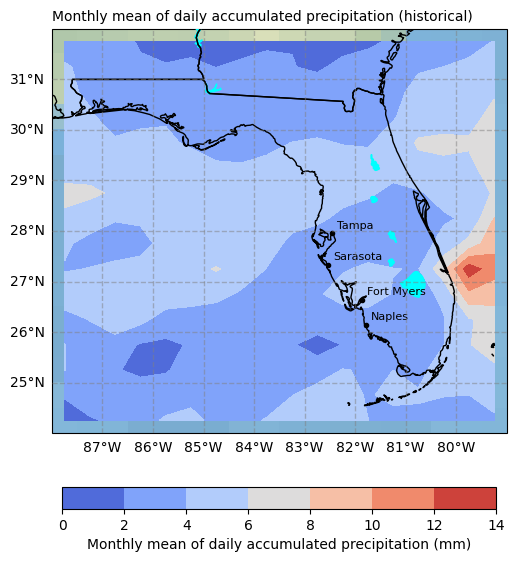

In [8]:
# Call the function plot_pr to plot the content of your DataSet
# for the first member and first timestep
plot_pr(ds,0,0)

### 3.3 Slice and plot historical pr data for North Florida

For North Florida, extract a subset of the data where latitude ranges from 29.5 to 31 and longitude ranges from -88 to -81. Assign this subset to a new variable named `ds_nf`.

In [9]:
# Slice the dataset 'ds' to select data within the latitude range of 29.5 to 31 and longitude range of -88 to -81
# Create a copy of the sliced data and assign it to the variable 'ds_nf'
ds_nf = ds.sel(lat=slice(29.5, 31), lon=slice(-88, -81)).copy()


**2 points**: Plot that slice for the first member and first time step for all lat and lon values

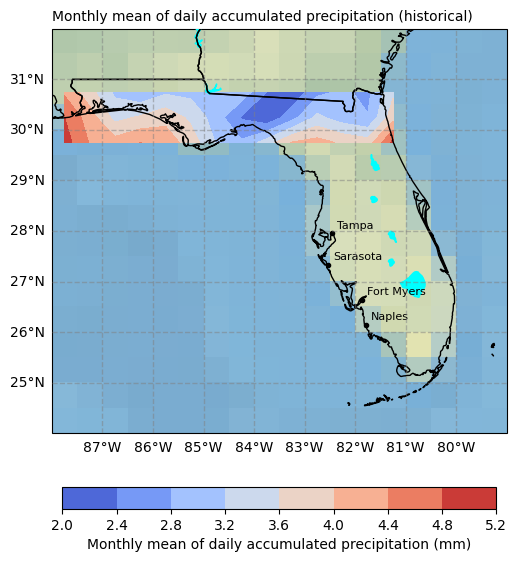

In [10]:
# Call the function plot_pr to plot the content of your DataSet
# for the first member and first timestep


### 3.4 Slice and plot historical pr data for South Florida

**2 points**: For South Florida, extract a subset of the data where latitude ranges from 24.6 to 27.5 and longitude ranges from -83 to -79.7. Assign this subset to a new variable named `ds_sf`.

In [11]:
# Slice the dataset 'ds' to select data within the latitude range of 24.6 to 27.5 and longitude range of -83 to -79.7
# Create a copy of the sliced data and assign it to the variable 'ds_sf'


**2 points**: Plot that slice for the first member and first time step for all lat and lon values

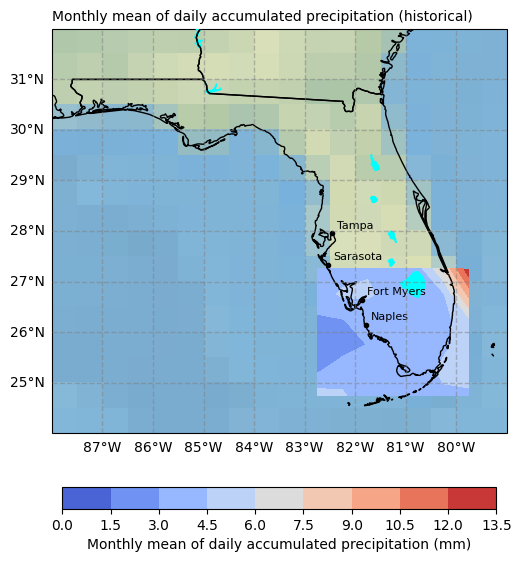

In [12]:
# Call the function plot_pr to plot the content of your DataSet
# for the first member and first timestep


### 3.5 Calculate and plot mean decadal pr of historical data 

**2 points**: Complete the code below.

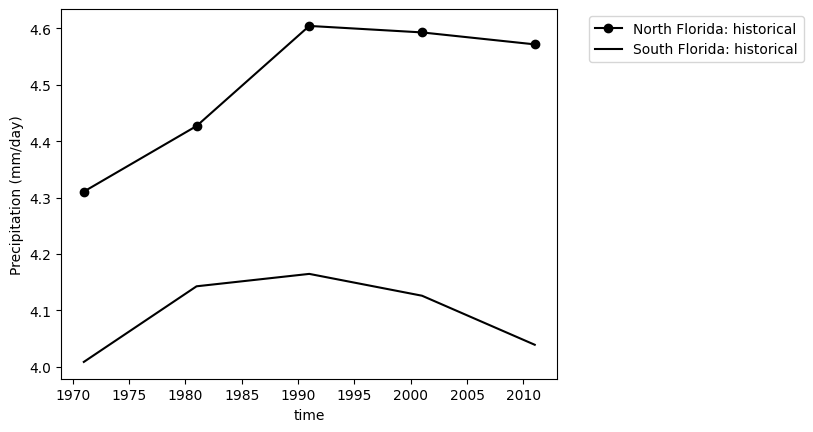

In [13]:
# For North Florida, calculate the mean decadal precipitation over members, latitude, and longitude dimensions
# Resample the data annually and calculate the mean over time
# Plot the resulting data with the given label
plot_label=f"North Florida: {ds.attrs['experiment_id']}"
ds_nf.pr.mean(dim=('member','lat','lon')).resample(time='10Y').mean(dim='time').plot(label=plot_label,color='black',marker='o')
plt.ylabel('Precipitation (mm/day)')

# For South Florida, calculate the mean decadal precipitation over members, latitude, and longitude dimensions
# Resample the data annually and calculate the mean over time
# Plot the resulting data with the given label


# Add a legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

### 3.6 Close file

In [14]:
# Close the file after reading the data
ds.close()

## 4. Data analysis (10 points)

Now, to address our research question, we will replicate the previous figure for historical data and include RCP2.6, RCP4.5, and RCP8.5 data. You should organize the codes for [data loading](#3.1-Load-historical-pr-data-for-Florida), [data slicing for North Florida](#3.3-Slice-and-plot-historical-pr-data-for-North-Florida), [data slicing for South Florida](#3.4-Slice-and-plot-historical-pr-data-for-South-Florida), [mean calculation](#3.5-Calculate-and-plot-mean-annual-pr-of-historical-data) in a for loop. 

### 4.1 Plot historical, RCP4.5, and RCP8.5 data for North and South Florida

Calculate and plot mean decadal pr for historical, RCP4.5, and RCP8.5 data for North and South Florida.

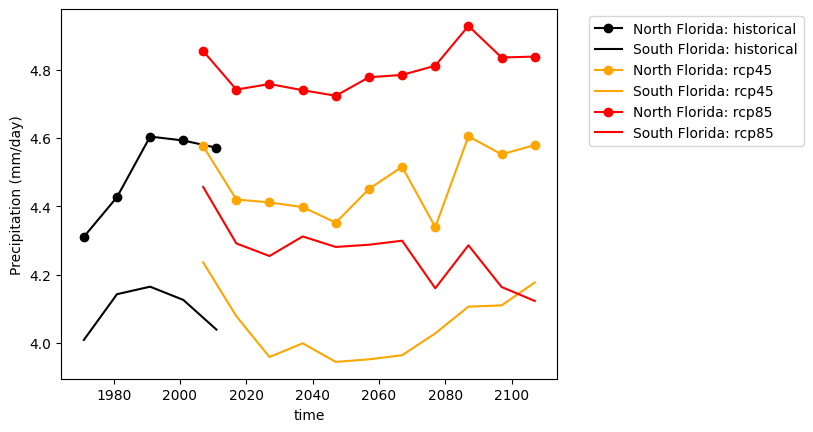

In [15]:
files =['pr_CORDEX-NAM_historical_mon_197001-200512_FL.nc',
        'pr_CORDEX-NAM_rcp45_mon_200601-210012_FL.nc',
        'pr_CORDEX-NAM_rcp85_mon_200601-210012_FL.nc']

line_colors= ['black','orange','red']

#Loop for all files 
for line_color,file in zip(line_colors,files):

    #Open dataset 
    ds = xr.open_dataset('Data\\cmip6\\' + file, engine='netcdf4')

    # Slice the dataset 'ds' to select data within the latitude range of 29.5 to 31 and longitude range of -88 to -81
    # Create a copy of the sliced data and assign it to the variable 'ds_nf'
    ds_nf = ds.sel(lat=slice(29.5, 31), lon=slice(-88, -81)).copy()

    # Slice the dataset 'ds' to select data within the latitude range of 24.6 to 27.5 and longitude range of -83 to -79.7
    # Create a copy of the sliced data and assign it to the variable 'ds_sf'
    ds_sf = ds.sel(lat=slice(24.6, 27.5), lon=slice(-83, -79.7)).copy()


    # For North Florida, calculate the mean precipitation over members, latitude, and longitude dimensions
    # Resample the data annually and calculate the mean over time
    # Plot the resulting data with the given label
    plot_label=f"North Florida: {ds.attrs['experiment_id']}"
    ds_nf.pr.mean(dim=('member','lat','lon')).resample(time='10Y').mean(dim='time').plot(label=plot_label,color=line_color,marker='o')

    # For South Florida, calculate the mean precipitation over members, latitude, and longitude dimensions
    # Resample the data annually and calculate the mean over time
    # Plot the resulting data with the given label
    plot_label=f"South Florida: {ds.attrs['experiment_id']}"
    ds_sf.pr.mean(dim=('member','lat','lon')).resample(time='10Y').mean(dim='time').plot(label=plot_label, color=line_color)
    plt.ylabel('Precipitation (mm/day)')

    # Close the file after reading the data
    ds.close()

# Add a legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

### 4.2 Plot historical, RCP2.6, RCP4.5, and RCP8.5 for South Florida

Calculate and plot mean decadal pr for historical, PRCP2.6, RCP4.5, and RCP8.5 data for South Florida

**10 points** : Complete the code below

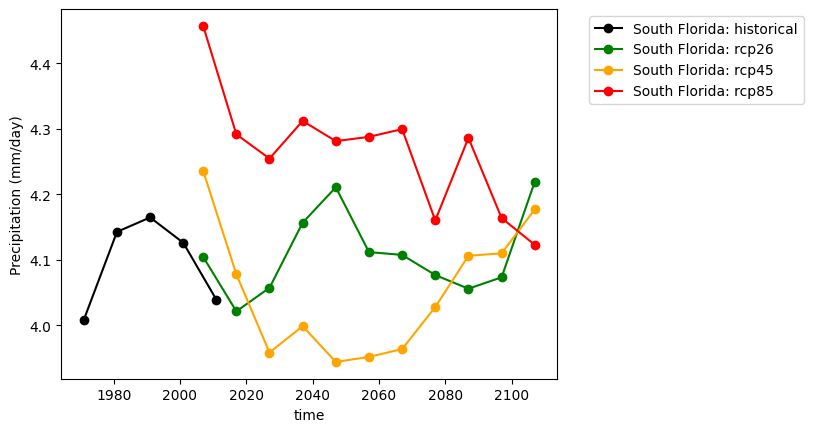

In [16]:
files =['pr_CORDEX-NAM_historical_mon_197001-200512_FL.nc',
        'pr_CORDEX-NAM_rcp26_mon_200601-210012_FL.nc',
        'pr_CORDEX-NAM_rcp45_mon_200601-210012_FL.nc',
        'pr_CORDEX-NAM_rcp85_mon_200601-210012_FL.nc']

line_colors= ['black','green','orange','red']

#Loop for all files 

    #Open dataset 

    # Slice the dataset 'ds' to select data within the latitude range of 24.6 to 27.5 and longitude range of -83 to -79.7
    # Create a copy of the sliced data and assign it to the variable 'ds_sf'

    # For South Florida, calculate the mean precipitation over members, latitude, and longitude dimensions
    # Resample the data annually and calculate the mean over time
    # Plot the resulting data with the given label

    # Close the file after reading the data

# Add a legend outside of the plot
